<a href="https://colab.research.google.com/github/david-adewoyin/machine_learning_from_scatch/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Softmax Regression
### Softmax Regression in Plain Python
*Softmax Regression* also called *multinomial * is a generalization of the logistic regression to multiple classes
### Notation and Definitions:  
- $y:   $    target value $\in \{{0,1,...k}\}$. where $k$ is the number of classes
- $a:$is the activation function
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\alpha:$ is the learning rate which determmines the step size at each iteration

- $\boldsymbol{W},b :   $ are the parameters of the algorithm, where 
    - $W$ is a matrix of weights associated with each class and 
    - $b$ is a vector which element are the bias of each class  
- $(\boldsymbol{x^{(i)}},y^{(i)})$: an instance of a training example.

The goal of **softmax** regression is to predict the target label given the feature vector of a data point where the target label could be one of many classes unlike the logistic regression which is strictly binary. The softmax regression works by outputing the likelihood of the target label being one of the classes and return the class with the highest likelihood.

### Training using Gradient Descent 

- In softmax regression we minimize the cost function below 

$$ J(\mathbf{w},b) = -\frac{1}{M} \sum_{i=1}^{M} \sum_{j=1}^{N} \left[{\boldsymbol{1}y^{(i)}==j} \boldsymbol{\log}\frac{e_j^{z(i)}}{\sum_{k=1}^{N}e_k^{z(k)}} \right] \tag{1} $$

where the **loss** of a single training data is given as :  
$$  L(a_1,a_2,a_3,..,a_N) = \begin{cases} 
 \text{- } log(a_1)  &   \text{if $y^{(i)} = 1$ }    \\
\text{- }log(a_2) & \text{if $y^{(i)} = 2$} \\
\vdots\\
  \text{- } log(a_N)  &   \text{if $y^{(i)} = N$ }  
\end{cases}$$ 

  
**Steps:**   
Step 0: initialize the weights and bias of every classes at random and store them in matrix $\boldsymbol{M} \text{and } \boldsymbol{b}$  


**Repeat until convergence {**   
Step 1 : calculate the linear combination of the **feature vectors** $\boldsymbol{x_{i}}$ with the weights and bias of every class.   
$$
z_1 = \boldsymbol{w_1 \cdot x} + b_1 \\
z_2 = \boldsymbol{w_2 \cdot x} + b_2 \\
\vdots \\
z_n = \boldsymbol{w_3 \cdot x} + b_n
$$  
Step 2: compute the activation function $a_i$ which ouput the likelihood of the various classes :
$$
a_1 = P(y=1|\boldsymbol{x}) = \frac{e^{z(1)}}{e^{z(1)} +e^{z(2)} + \cdots + e^{z(n)}} \\
a_2 = P(y=2|\boldsymbol{x}) = \frac{e^{z(2)}}{e^{z(1)} +e^{z(2)} + \cdots + e^{z(n)}} \\
\vdots\\
a_n = P(y=n|\boldsymbol{x}) = \frac{e^{z(n)}}{e^{z(1)} +e^{z(2)} + \cdots + e^{z(n)}} \\
$$
  
Step 3:  calculate the partial derivates of **w** and *b* where **y** and $ \boldsymbol{y^{hat}}$ are one hot matrix of the true value and likelihood of the various classes respectively. $ \boldsymbol{y^{hat}} = [a_1,a_2,...,a_n]$ :


$$  
\begin{align}
\frac{\partial}{\partial w_j} J(\boldsymbol{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(y^{hat} - y^{(i)})\boldsymbol{X_j^{(i)}} \tag{2} \\
\frac{\partial}{\partial b} J(\boldsymbol{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(y^{hat} - y^{(i)}) \tag{3}
\end{align}
$$ 
Step 4: update **w** and *b* respectively:   

$$  
\begin{align}
w_{j} = w_{j} - \alpha \frac{\partial}{\partial w_j} J(\boldsymbol{w,b})  \tag{4} \\ 
b_{j} = b_{j} - \alpha \frac{\partial}{\partial b} J(\boldsymbol{w,b})  \tag{5}
\end{align}
$$  
**}**  

In [1]:
## Importing required modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

np.random.seed(150)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

### Datasets
We are going to use the iris dataset for this example where we try to predict the various species of the iris flower given a data point

In [2]:
## We are going to use the popular iris datasets consisting of 150 training examples and four features
## the goal of this algorithm is to classify the four(4) species of the iris flower given a set of input features

iris = load_iris()
X,y=iris.data,iris.target

print(f"X shape : {X.shape}") # We have 150 training examples consisting of 4 input features each
print(f"The features of the datasets: {iris.feature_names}")
print(f"The species of the iris datasets to classify :{iris.target_names}")

X shape : (150, 4)
The features of the datasets: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The species of the iris datasets to classify :['setosa' 'versicolor' 'virginica']


In [3]:
## We split the data in order to be able to test the accuracy of our model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:{X_test.shape}")

X_train shape: (105, 4)
X_test shape:(45, 4)


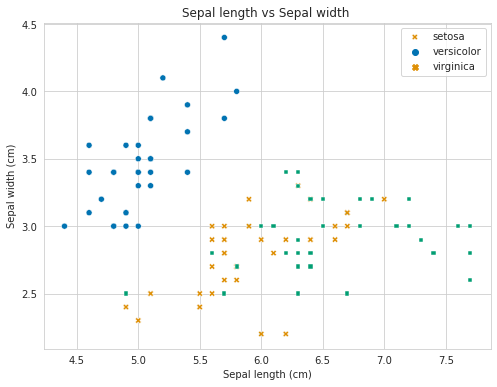

In [4]:
fig,ax=plt.subplots(figsize=(8,6))

## plotting the Sepal length against Sepal width of each examples
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,style=y_train,palette='colorblind')

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal length vs Sepal width ")
plt.legend(iris.target_names)

## Softmax Regression

In [5]:
class SoftmaxRegression:
    """
        Trains a softmax regression model using gradient descent
        """
    def __init__(self, n_iters=1_000,learning_rate=0.01,verbose=False):
        self.n_iters= n_iters
        self.learning_rate = learning_rate
        self.verbose = verbose
    
    def predict(self,X):
        scores = self.compute_scores(X)
        probs = self.activation(scores)
        return np.argmax(probs,axis=1)[:,np.newaxis]
    
    def compute_scores(self,X):
        z = np.dot(X , self.W.T)  + self.b 
        return z
        
    def fit(self,X,y):
        
        m_rows,n_features  = X.shape # (number of examples, number of features )
        self.classes =np.unique(y)
        self.n_classes = self.classes.shape[0]
        
        ## initialize  the set of weights and bias to some random value
        self.W = np.zeros((self.n_classes,n_features))
        self.b = np.zeros((1,self.n_classes,))
        costs= []
        
        y_hot = self.one_hot_encoder(y)
        
        for i in range(self.n_iters):
            m_rows,n_features  = X.shape # (number of examples, number of features 
        
            scores = self.compute_scores(X)
            probs = self.activation(scores)
            
            cost = self.cross_entropy(y_hot,probs)
            costs.append(cost)
            
            dj_dw = (np.dot(X.T,probs - y_hot))/m_rows
            dj_db = np.sum(probs-y_hot,axis=0)/m_rows
        
            self.W = self.W -  self.learning_rate * dj_dw.T
            self.b = self.b -  self.learning_rate * dj_db 
            
            if  self.verbose and i % 100 == 0 : # print out the value of our costs function at every 500 iterations
                print(f"Cost as iteration {i}: {cost :.3f}")
            
            
    def cross_entropy(self,y_true,probs):
        m_rows = y_true.shape[0]
        loss = - (1 / 150) * np.sum(y_true * np.log(probs))
        return loss
               
    def activation(self,scores):
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        return softmax

    
    def one_hot_encoder(self,y):
        m_rows = y.shape[0]
        one_hot = np.zeros((m_rows,self.n_classes))
        one_hot[np.arange(m_rows),y.T] = 1
        return one_hot
        
       

## Training our model 

In [6]:
clf =SoftmaxRegression()
clf.fit(X_train,y_train)
y_pred_train= clf.predict(X_train)

acc_train = accuracy_score(y_train,y_pred_train)
print(f"accuracy on the training set: {acc_train :.3f}")

accuracy on the training set: 0.952


## Testing our model

In [7]:
## calling predict on the test set
y_pred_test=clf.predict(X_test)

## calculating the accuracy of our model 
acc_test=accuracy_score(y_test,y_pred_test)
print(f"accuracy on the testing set: {acc_test:.3f}")

accuracy on the testing set: 0.911
